# Analyzing CIA Factbook Data

In this project, we'll work with data from the [CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/), a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like areas of land and water, population and its growth. The database with which we'll be working can be found in this [GitHub repo](https://github.com/factbook/factbook.sql/releases).

## Importing the data

In [3]:
import pandas as pd
import sqlite3 as sql

conn = sql.connect('factbook.db')
q0 = "SELECT * FROM sqlite_master WHERE type='table'"
pd.read_sql_query(q0, conn)

type             name         tbl_name  rootpage  \
0  table  sqlite_sequence  sqlite_sequence         3   
1  table            facts            facts        47   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...

In [4]:
q1 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q1, conn)

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46

## Testing some queries

In [7]:
q3 = '''SELECT 
MIN(population) min_pop, 
MAX(population) max_pop,
MIN(population_growth) min_pop_growth, 
MAX(population_growth) max_pop_growth 
FROM facts'''
pd.read_sql_query(q3, conn)

min_pop     max_pop  min_pop_growth  max_pop_growth
0        0  7256490011             0.0            4.02

It looks odd there are countries with populaions of 0 and 7.2 billion people, let's check out.

In [8]:
q4 = '''SELECT * FROM facts WHERE population = 0'''
pd.read_sql_query(q4, conn)

id code        name  area  area_land area_water  population  \
0  250   ay  Antarctica  None     280000       None           0   

  population_growth birth_rate death_rate migration_rate  
0              None       None       None           None

In [9]:
q5 = '''SELECT * FROM facts WHERE population = 7256490011'''
pd.read_sql_query(q5, conn)

id code   name  area area_land area_water  population  population_growth  \
0  261   xx  World  None      None       None  7256490011               1.08   

   birth_rate  death_rate migration_rate  
0        18.6         7.8           None

Now it makes sense, while the first is Antarctica, where no one lives, the second one is the entire world, which explains the gigantic population.

## Histograms

C:\Users\iemon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DD9D0A438>,
      dtype=object)

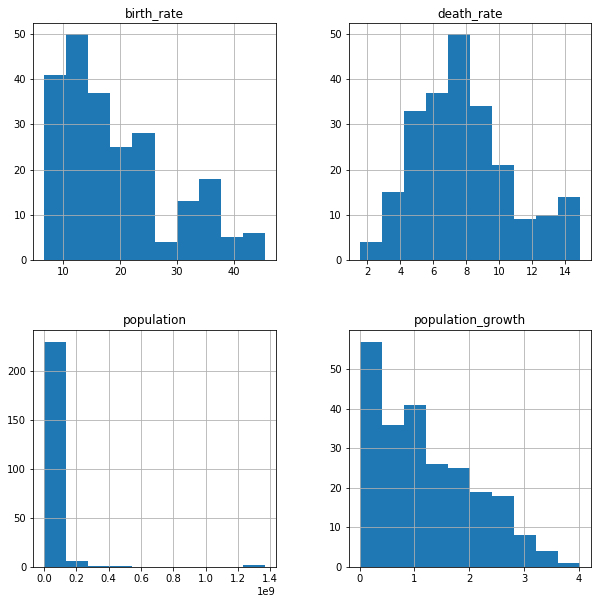

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,10))

q6 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (select max(population) from facts)
AND population != (select min(population) from facts);
'''

pd.read_sql_query(q6, conn).hist(ax=ax)

# Population Density

In [35]:
q7 = '''SELECT name, cast(population as float)/cast(area as float) density 
FROM facts order by density desc LIMIT 20'''
pd.read_sql_query(q7, conn)

name       density
0          Macau  21168.964286
1         Monaco  15267.500000
2      Singapore   8141.279770
3      Hong Kong   6445.041516
4     Gaza Strip   5191.819444
5      Gibraltar   4876.333333
6        Bahrain   1771.859211
7       Maldives   1319.640940
8          Malta   1310.015823
9        Bermuda   1299.925926
10  Sint Maarten   1167.323529
11    Bangladesh   1138.069143
12      Guernsey    847.179487
13        Jersey    838.741379
14      Barbados    675.823256
15     Mauritius    656.777941
16        Taiwan    650.781712
17         Aruba    623.122222
18       Lebanon    594.682788
19  Saint Martin    588.037037